# Exploring the use of Batch Normalization in building and training NN model.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset and dividing into train, validation and test sets

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_valid, x_train = x_train_full[:5000] / 255 , x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255

## Building the model

In [4]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation = 'softmax'))

- We have added a BN layer in the beginning to replace the functionality of Standard Scaler.
- The after each hidden layer a BN layer is added.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [14]:
for var in model.layers[1].variables:
    print(var.name, var.trainable)

batch_normalization/gamma:0 True
batch_normalization/beta:0 True
batch_normalization/moving_mean:0 False
batch_normalization/moving_variance:0 False


In [15]:
model.layers[1].updates

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


[]

## Compiling the model

In [17]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.SGD(lr = 1e-3), metrics = ['accuracy'])

## Training the model

In [18]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.8558 - accuracy: 0.7168 - val_loss: 0.5625 - val_accuracy: 0.8152
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5782 - accuracy: 0.8040 - val_loss: 0.4834 - val_accuracy: 0.8382
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5226 - accuracy: 0.8210 - val_loss: 0.4465 - val_accuracy: 0.8494
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4839 - accuracy: 0.8338 - val_loss: 0.4246 - val_accuracy: 0.8564
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4597 - accuracy: 0.8395 - val_loss: 0.4075 - val_accuracy: 0.8600
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4402 - accuracy: 0.8469 - val_loss: 0.3967 - val_accuracy: 0.8636
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4279 - accuracy: 0.8511 - val_loss: 0.3857 - val_accuracy:

In [19]:
df_metrics = pd.DataFrame(history.history)

<AxesSubplot:>

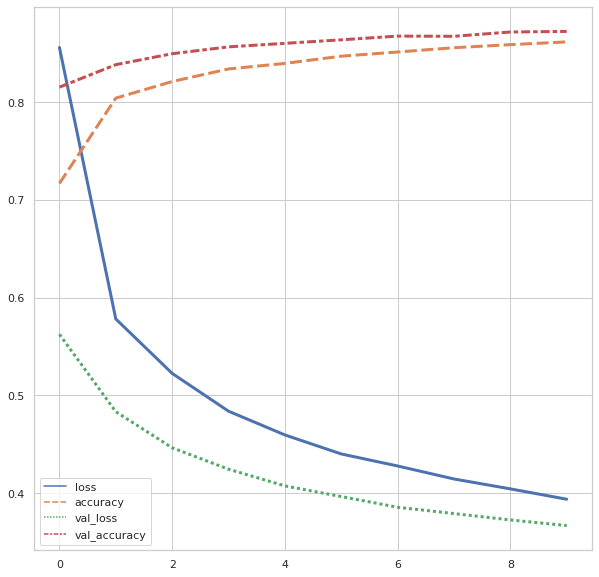

In [22]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,10))
sns.lineplot(data = df_metrics, linewidth = 3)

## Evaluating the model

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8559


[0.40472301840782166, 0.85589998960495]

## Adding the BN layer before activation func.

- There is a debate on whether to add the BN layer before the activation func. or after it. 
- The decision is purely experimental as we can do either of the methods depending on the dataset.

In [24]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, use_bias = False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(100, use_bias = False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [28]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.SGD(lr = 1e-3), metrics = ['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 3ms/step - loss: 1.0391 - accuracy: 0.6783 - val_loss: 0.6719 - val_accuracy: 0.7962
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6757 - accuracy: 0.7855 - val_loss: 0.5560 - val_accuracy: 0.8252
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5952 - accuracy: 0.8051 - val_loss: 0.5025 - val_accuracy: 0.8358
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5455 - accuracy: 0.8198 - val_loss: 0.4699 - val_accuracy: 0.8452
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5126 - accuracy: 0.8279 - val_loss: 0.4459 - val_accuracy: 0.8522
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4896 - accuracy: 0.8346 - val_loss: 0.4291 - val_accuracy: 0.8536
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4731 - accuracy: 0.8393 - val_loss: 0.4153 - val_accuracy:

In [30]:
df_metrics = pd.DataFrame(history.history)

<AxesSubplot:>

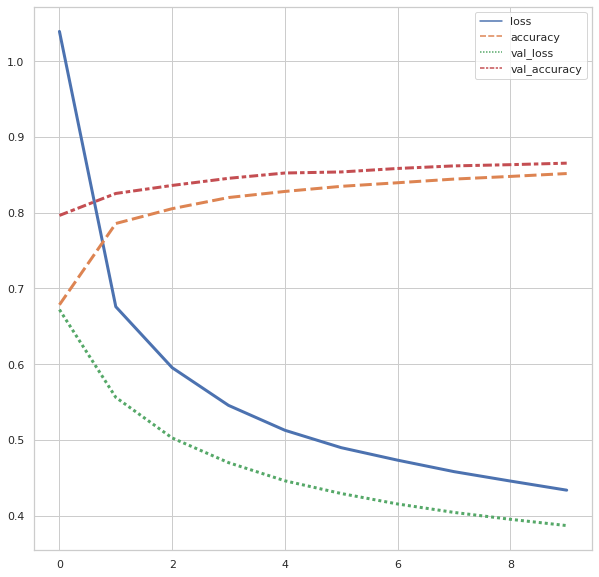

In [31]:
plt.figure(figsize = (10,10))
sns.lineplot(data = df_metrics, linewidth = 3)

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8498


[0.42849868535995483, 0.8497999906539917]